## **📊 Analisador de Vendas**
Este projeto realiza uma análise simples de vendas a partir de um arquivo CSV contendo:
- Produto vendido
- Vendedor
- Data da venda
- Valor

Serão calculadas métricas como:
- Total de vendas
- Vendas por produto
- Vendas por vendedor
- Vendas por data (dia/mês)

Importação da bibliotecas (pandas e matplotlib)


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Markdown,display

**Adicionando Banco de dados e indicando ao pandas que a coluna 'data' vai ser tratada como tempo**

In [15]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/vendas.csv')
df['data']= pd.to_datetime(df['data'])

**Calculando o total de vendas e armazenando-a em uma variável para ser exbida na função revisão, vai ser feito o mesmo processo para outros itens, além disso utilizei .groupby para somar os valores totais de 'produto' e 'vendedor' colocando o resultado em mais duas variáveis. Ao obter essas variáveis transformei elas em DataFrame para melhor visualização e manipulação**

In [16]:
total_de_vendas = df['valor'].sum()
por_produto = df.groupby('produto')['valor'].sum()
por_vendedor = df.groupby ('vendedor')['valor'].sum()
df_produtos = por_produto.reset_index()
df_produtos.set_index('produto',inplace=True)
df_vendedor = por_vendedor.reset_index()
df_vendedor.set_index('vendedor',inplace= True)

**Após ter os respectivos valores das ultimas variáveis, posso definir qual foi o maior, tanto em vendedor qaunto em produto, para isso usei o idxmax e max, idxmax para identificar o produto/vendedor e max para encontrar seus respectivo valores.**

In [17]:
produto = por_produto.idxmax()
valor = por_produto.max()
vendedor = por_vendedor.idxmax()
total = por_vendedor.max()
print(produto,valor)

Tênis 450.0


**Neste momento, precisei adicionar uma nova coluna no meu data frame, pois iria ver o mês que mais vendeu e utilzar a coluna 'data' que foi indicada ao pandas, para criação da coluna nova 'mes' apliquei o month_name, que faz parte da propriedade datetime (dt), subsequente repiti o mesmo ráciocino para encontrar o produto mais vendido, mas como eu queria somente o mês optei por não encontrar o valor, com isso utilizei somente o idxmax.**

In [18]:
df['mes']= df['data'].dt.month_name()
total_mes = df.groupby('mes')['valor'].sum()
mes = total_mes.idxmax()


**Antes de ir para o final do projeto resolvi descubrir a média para que cliente possa futuramente comparar com outras temporadas de vendas, para isso utilizei o describe e loc. Foi armazenado o describe da coluna valor, para uma variável desc e em seguida a localização do index mean, com loc.**

In [19]:
desc = df.valor.describe()
media = desc.loc['mean']

**Função para efetuar a montagem dos gráficos para melhor visualização.**

In [20]:
def plotar_barras (serie,title, xlabel, ylabel, cor='skyblue'):
  serie.plot(kind='bar',color=cor)
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.xticks(rotation=45)
  plt.grid(axis='y')
  plt.tight_layout() #linha para marcar valores do eixo y
  return plt.show()



**Função para mostrar todos os resultados feitos acima.**

Total de vendas foi de R$ 1459.20!

A média de vendas é de 72.96!

A partir de agora vem algumas infromações para lhe ajudar a fazer uma análise mais completa!

 
📦 Vendas por Produtos

           valor
produto        
Boné      100.0
Calça     269.7
Camiseta  249.5
Jaqueta   360.0
Meia       30.0
Tênis     450.0



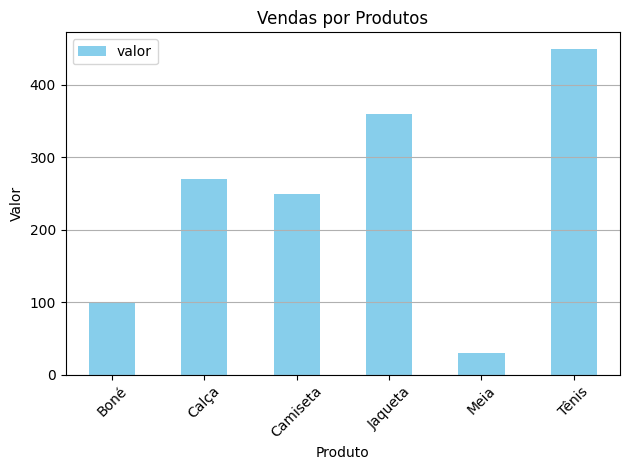

O produto que mais vendeu foi Tênis e seu valor total foi de R$ 450.00



🧍‍♂️ Vendas por Vendedor


           valor
vendedor       
Ana       499.7
Beto      374.7
Carlos    264.9
João      319.9



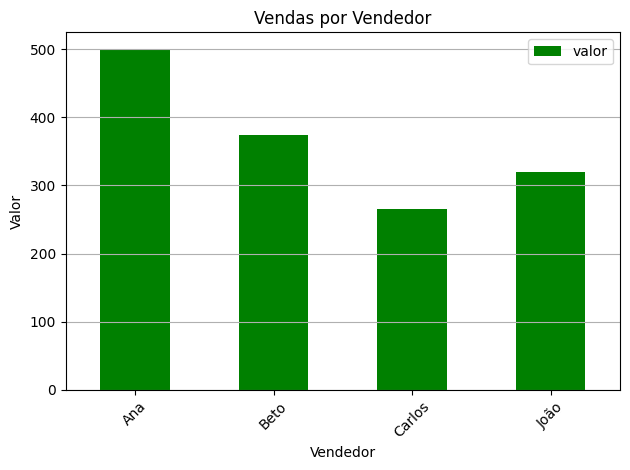

já o vendedor que mais vendeu foi o/a Ana, vendendo incríveis R$ 499.70


📅 Vendas por Mês



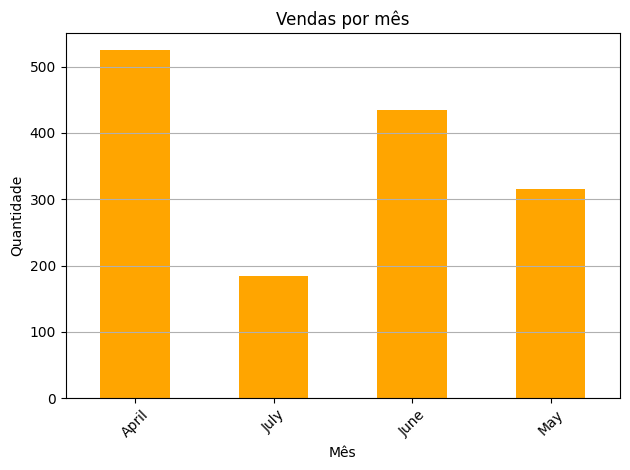

Mês que mais vendeu foi April


## ✅ Conclusão Automática

Com base nos dados analisados:

- 🛍️ Produto mais vendido: Tênis
- 👤 Vendedor destaque: Ana
- 📅 Mês com mais vendas: April   




In [27]:
def revisão (df):

  print(f'Total de vendas foi de R$ {total_de_vendas:.2f}!\n')
  print (f'A média de vendas é de {media:.2f}!\n')
  print('A partir de agora vem algumas infromações para lhe ajudar a fazer uma análise mais completa!\n\n ')
  print(f'📦 Vendas por Produtos\n')
  print(f' {df_produtos}\n')
  plotar_barras(df_produtos,'Vendas por Produtos','Produto','Valor')
  print(f'O produto que mais vendeu foi {produto} e seu valor total foi de R$ {valor:.2f}\n')
  print(f'\n\n🧍‍♂️ Vendas por Vendedor\n')
  print(f'\n {df_vendedor}\n')
  plotar_barras(df_vendedor,'Vendas por Vendedor','Vendedor','Valor',cor='green')
  print(f'já o vendedor que mais vendeu foi o/a {vendedor}, vendendo incríveis R$ {total:.2f}\n\n')
  print(f'📅 Vendas por Mês\n')
  plotar_barras(total_mes,'Vendas por mês','Mês','Quantidade', cor= 'orange')
  print(f'Mês que mais vendeu foi {mes}\n')
  print(f"""
## ✅ Conclusão Automática

Com base nos dados analisados:

- 🛍️ Produto mais vendido: {produto}
- 👤 Vendedor destaque: {vendedor}
- 📅 Mês com mais vendas: {mes}
""")
  return''

print(revisão(df))

